Để minh họa ví dụ của Hồi quy Bình phương Bình phương (OLS) trong Python, 
chúng ta sẽ sử dụng thư viện numpy để xử lý dữ liệu và tính toán, và matplotlib để trực quan hóa kết quả. 
Đầu tiên, hãy cài đặt các thư viện này nếu bạn chưa có chúng:

pip install numpy matplotlib

Sau đó, chúng ta sẽ tạo một ví dụ đơn giản với một tập dữ liệu giả định. 
Giả sử chúng ta có dữ liệu điểm thi của một nhóm học sinh với biến độc lập là số giờ học và biến phụ thuộc là điểm thi cuối kỳ.

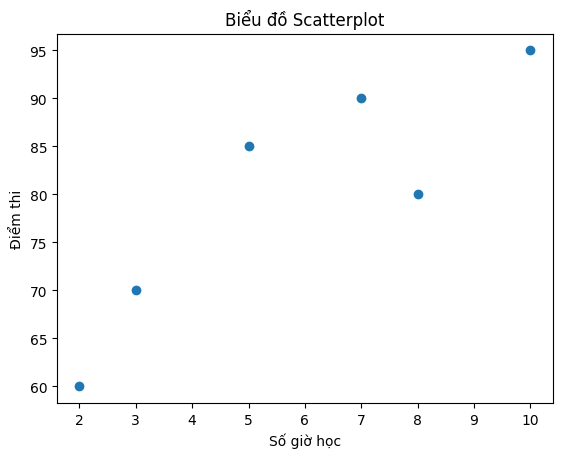

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu ví dụ
hours_studied = np.array([2, 5, 3, 7, 10, 8])
exam_scores = np.array([60, 85, 70, 90, 95, 80])

# Bước 1: Vẽ biểu đồ scatterplot
plt.scatter(hours_studied, exam_scores)
plt.xlabel('Số giờ học')
plt.ylabel('Điểm thi')
plt.title('Biểu đồ Scatterplot')
plt.show()

Sau khi chạy mã trên, bạn sẽ thấy một biểu đồ Scatterplot với các điểm dữ liệu được phân tán trên mặt phẳng. 
Tiếp theo, chúng ta sẽ thực hiện Hồi quy Bình phương Bình phương để tìm đường thẳng phù hợp nhất.

In [4]:
# Bước 2: Thêm cột 1 vào biến độc lập để tính hệ số chặn
X = np.column_stack((np.ones_like(hours_studied), hours_studied))
X

array([[ 1,  2],
       [ 1,  5],
       [ 1,  3],
       [ 1,  7],
       [ 1, 10],
       [ 1,  8]])

In [6]:
exam_scores

array([60, 85, 70, 90, 95, 80])

In [5]:
# Bước 3: Tính toán hệ số bằng OLS
coefficients = np.linalg.inv(X.T @ X) @ X.T @ exam_scores
coefficients

array([58.20284698,  3.7366548 ])

Trước tiên, chúng ta cần hiểu một số khái niệm trước khi giải thích công thức đó.

1. `X`: Là ma trận chứa các giá trị đặc trưng hoặc thuộc tính của dữ liệu đầu vào (input data). Mỗi hàng của ma trận X tương ứng với một mẫu dữ liệu, và mỗi cột của ma trận X tương ứng với một đặc trưng của dữ liệu.

2. `exam_scores`: Là một vector chứa các điểm số kết quả (target variable) mà chúng ta muốn dự đoán hoặc dự báo dựa trên dữ liệu đầu vào (ma trận X).

3. `np.linalg.inv()`: Đây là một hàm trong thư viện numpy (một thư viện trong Python) để tính ma trận nghịch đảo.

4. `@`: Đây là toán tử phép nhân ma trận trong Python, được giới thiệu từ phiên bản Python 3.5 trở lên. Nó thay thế cho hàm `np.dot()` để thực hiện phép nhân ma trận.

Bây giờ, chúng ta có thể giải thích công thức trên như sau:

1. `X.T @ X`: Đây là một phép nhân ma trận, trong đó `X.T` là ma trận chuyển vị của `X`. Kết quả của phép nhân này là một ma trận mới, được tính bằng cách nhân ma trận chuyển vị của `X` với `X` ban đầu.

2. `np.linalg.inv(X.T @ X)`: Đây là phép tính ma trận nghịch đảo của kết quả `X.T @ X` đã tính ở bước trước. Nghịch đảo của một ma trận cho phép tìm ra ma trận có tích với nó là ma trận đơn vị.

3. `@ exam_scores`: Sau khi tính được ma trận nghịch đảo `np.linalg.inv(X.T @ X)`, chúng ta tiếp tục nhân ma trận này với `exam_scores` để tìm ra các hệ số (coefficients) của mô hình dự đoán.

Vậy kết quả của biểu thức `coefficients = np.linalg.inv(X.T @ X) @ X.T @ exam_scores` là một vector chứa các hệ số mô hình, được tính bằng cách thực hiện các phép nhân ma trận như đã mô tả trên. Điều này liên quan đến các phương pháp hồi quy tuyến tính và giúp xây dựng mô hình dự đoán dựa trên dữ liệu đầu vào `X` và các điểm số kết quả `exam_scores`.

In [2]:

# Lấy các hệ số riêng biệt
intercept, slope = coefficients

# Bước 4: In kết quả
print("Hệ số chặn (Intercept):", intercept)
print("Hệ số góc (Slope):", slope)


Hệ số chặn (Intercept): 58.20284697508901
Hệ số góc (Slope): 3.7366548042704633


Sau khi chạy đoạn mã trên, bạn sẽ nhận được kết quả về các hệ số chặn và góc của đường thẳng phù hợp nhất.  Trong ví dụ này, đường thẳng phù hợp nhất sẽ được biểu diễn bởi phương trình: Điểm thi = Intercept + Slope * Số giờ học.

Cuối cùng, chúng ta có thể trực quan hóa đường thẳng phù hợp nhất cùng với các điểm dữ liệu trên biểu đồ.

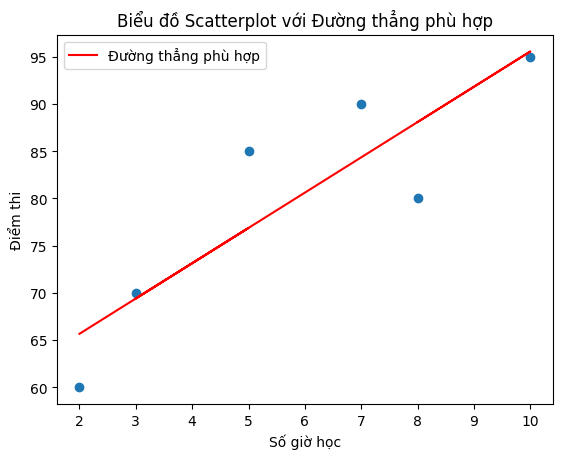

In [7]:
# Bước 5: Trực quan hóa đường thẳng phù hợp nhất
plt.scatter(hours_studied, exam_scores)
plt.plot(hours_studied, intercept + slope * hours_studied, color='red', label='Đường thẳng phù hợp')
plt.xlabel('Số giờ học')
plt.ylabel('Điểm thi')
plt.title('Biểu đồ Scatterplot với Đường thẳng phù hợp')
plt.legend()
plt.show()